<a href="https://www.kaggle.com/code/yutodennou/tips-make-gridsearchcv-faster?scriptVersionId=154831106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Purpose🎉 </b></div>

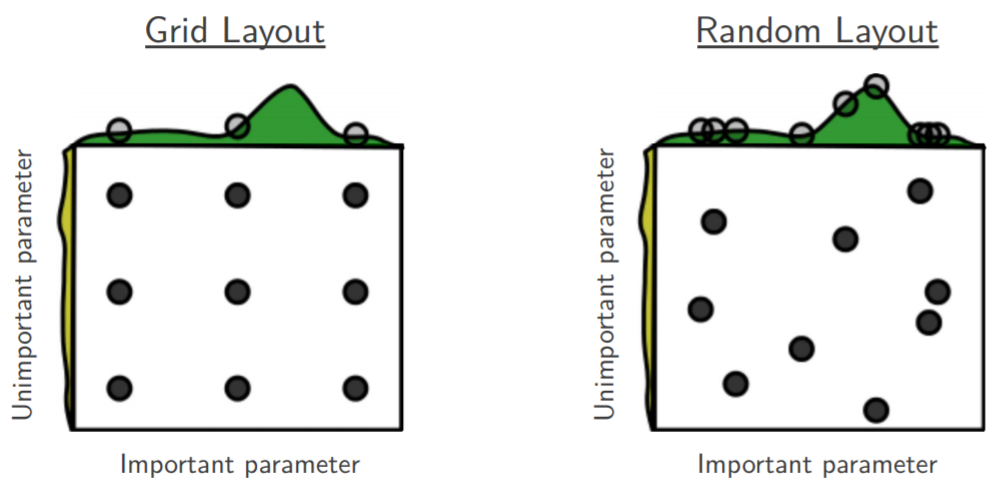

If you think this is not a problem because you compute while you sleep or go out, then you may not need this tips. However many analysts want to speed up the computation same as me.

Setting up parameters can be difficult, especially for the uninitiated, so I shows you how to reduce calculation costs with just a few changes to the default parameter settings!

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Gridsearch💡 </b></div>

Gridsearch is a computationally heavy process. It often takes a tremendous amount of processing time depending on the data and the algorithm.
We also know it's because exploring all options like below.
```
params = {'eta': [0.01, 0.1, 1.0], 'gamma': [0.1, 0.5, 0.8], 
                  'n_estimators': [10, 100, 500], 'max_depth':[2, 4, 6], 
                  'min_child_weight': [1, 2], 'nthread': [2] }
```

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Contents📚 </b></div>

I compared with the processing time of 3 options below,

1. Almost default  
2. Setting some arguments  
3. More recommendation than option 2  

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Import Libs🗃️ </b></div>

In [1]:
import time
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Import Data🔍 </b></div>

In [2]:
# Using Cancer Data As An Example
cancer = load_breast_cancer()
cancer_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_target = pd.Series(cancer.target)

train_x, test_x, train_y, test_y = \
        train_test_split(cancer_data, cancer_target, test_size=0.2, shuffle=True)

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. XGBoost + GridSearchCV🛠️ </b></div>

## 1.Default Argument

In [3]:
# Gridsearch Params
params = {'eta': [0.01, 0.1, 1.0], 'gamma': [0, 0.1], 
                  'n_estimators': [10, 100, 500], 'max_depth':[2, 4, 6], 
                  'min_child_weight': [1, 2], 'nthread': [2] }

# Instance
model = xgb.XGBClassifier()

# Gridsearch
time_sta = time.time()
clf = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=1)
clf.fit(train_x, train_y)
time_end = time.time()
tim = time_end- time_sta
print(tim)

81.97419285774231


In [4]:
# Score
print("Best score: %.4f" % (clf.best_score_))
print(clf.best_params_)

model = clf.best_estimator_
pred = model.predict(test_x)
score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

Best score: 0.9582
{'eta': 0.1, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500, 'nthread': 2}
score:0.9825


## 2.Faster Setting

CV: That's the important argument as a fold number. Default is 5.  
Verbose: The output information. 0 is no messages.  
Return_train_score: The cv_results_ attribute includes training scores. The default value had been changed from True to False from ver 0.21  

In [5]:
# Gridsearch Params
params = {'eta': [0.01, 0.1, 1.0], 'gamma': [0, 0.1], 
                  'n_estimators': [10, 100, 500], 'max_depth':[2, 4, 6], 
                  'min_child_weight': [1, 2], 'nthread': [2] }

# Instance
model = xgb.XGBClassifier()

# Gridsearch
time_sta = time.time()
clf = GridSearchCV(estimator=model, param_grid=params, 
                    cv=3, scoring="accuracy", n_jobs=1, verbose=0, return_train_score=False)
clf.fit(train_x, train_y)
time_end = time.time()
tim = time_end- time_sta
print(tim)

45.343998670578


In [6]:
# Score
print("Best score: %.4f" % (clf.best_score_))
print(clf.best_params_)

model = clf.best_estimator_
pred = model.predict(test_x)
score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

Best score: 0.9692
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500, 'nthread': 2}
score:0.9649


## 3.More Recommend for Flexibility

Using KFold, SKF or GKF as the cv value would be better.

In [7]:
# Gridsearch Params
params = {'eta': [0.01, 0.1, 1.0], 'gamma': [0, 0.1], 
                  'n_estimators': [10, 100, 500], 'max_depth':[2, 4, 6], 
                  'min_child_weight': [1, 2], 'nthread': [2] }

# Instance
model = xgb.XGBClassifier()

# Gridsearch with StratifiedKFold
time_sta = time.time()
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params, 
                    cv=skf, scoring="accuracy", n_jobs=1, verbose=0, return_train_score=False)
clf.fit(train_x, train_y)
time_end = time.time()
tim = time_end- time_sta
print(tim)

44.704007148742676


In [8]:
# Score
print("Best score: %.4f" % (clf.best_score_))
print(clf.best_params_)

model = clf.best_estimator_
pred = model.predict(test_x)
score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

Best score: 0.9582
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 500, 'nthread': 2}
score:0.9649
